K-NEAREST NEIGHBOURS

Objective:
 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datase
ts
Datas
et:
Need to Classify the animal 
asks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.


In [1564]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [1566]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [1568]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [1570]:
df.rename(columns={'animal name':'animal_name'},inplace=True)

In [1572]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [1574]:
df['animal_name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [1576]:
df.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [1578]:
df.duplicated().sum()

0

In [1580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [1582]:
df.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [1584]:
df.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

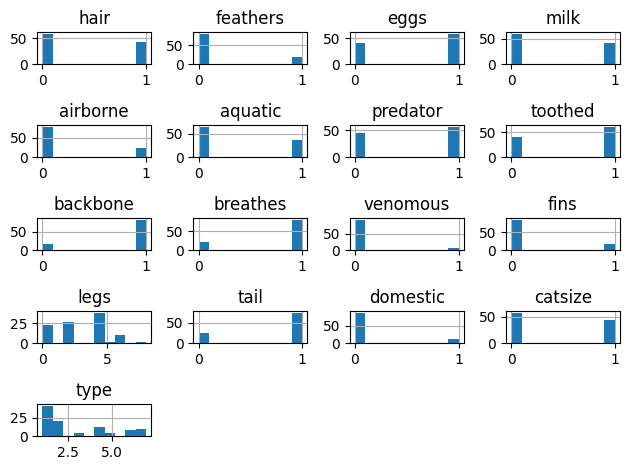

In [1586]:
df.hist()
plt.tight_layout()

<Axes: >

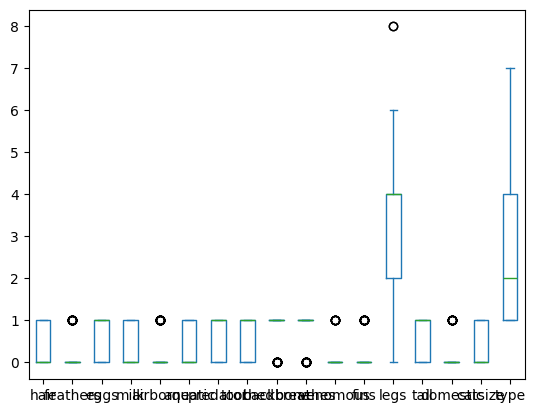

In [1587]:
df.plot(kind='box')    # outliers are present

<Axes: >

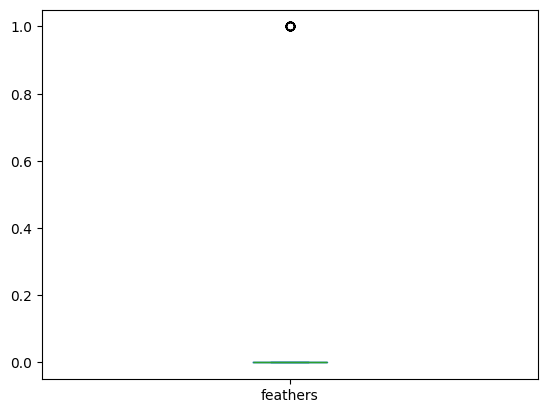

In [1588]:
df['feathers'].plot(kind='box')           # outliers are present on the upper side

<Axes: >

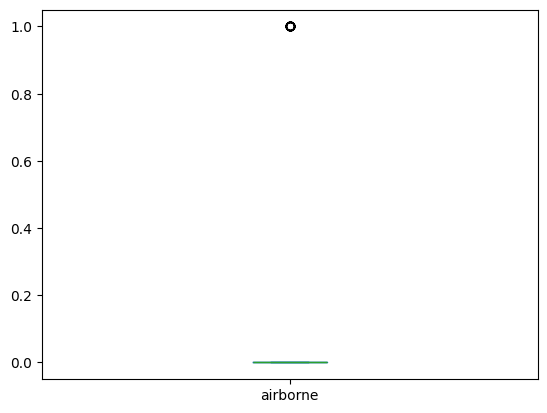

In [1589]:
df['airborne'].plot(kind='box')      # outliers are present on the upper side

<Axes: >

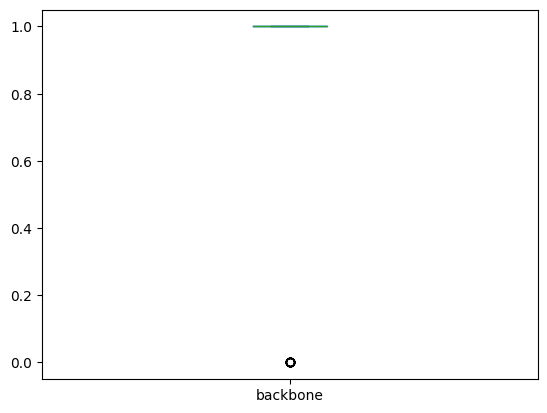

In [1590]:
df['backbone'].plot(kind='box')    # outliers are present on the lower side

<Axes: >

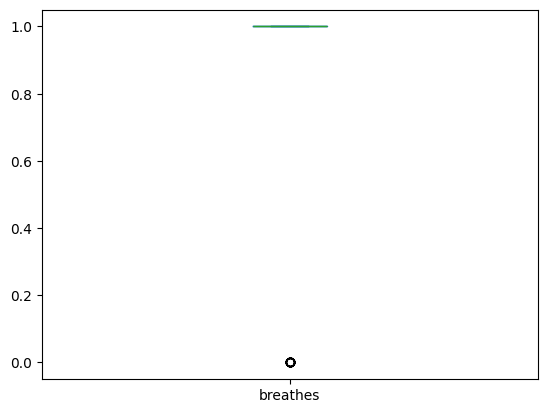

In [1596]:
df['breathes'].plot(kind='box')    # outliers are present on the lower side

<Axes: >

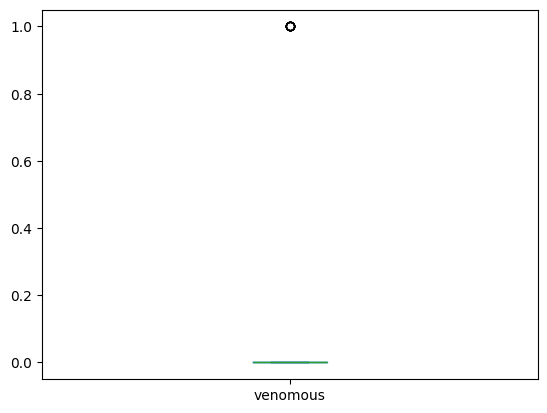

In [1598]:
df['venomous'].plot(kind='box')     # outliers are present on the upper side

<Axes: >

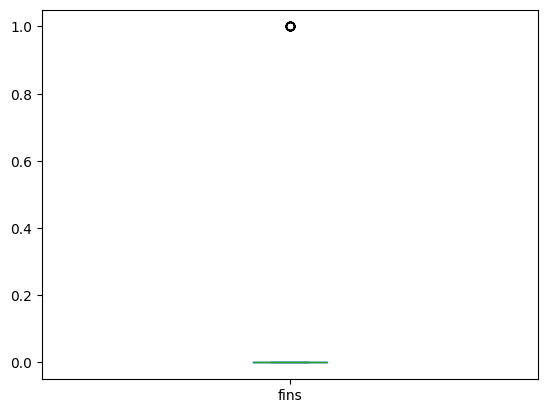

In [1600]:
df['fins'].plot(kind='box')       # outliers are present on the upper side 

<Axes: >

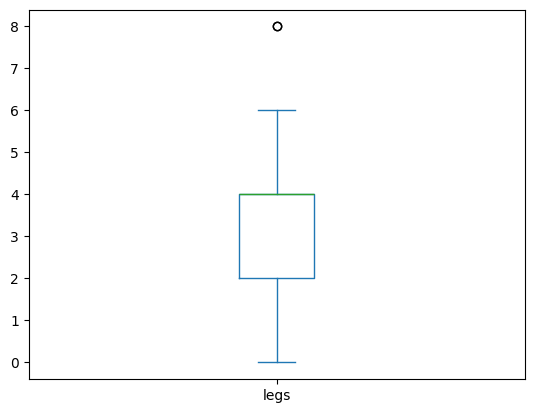

In [1602]:
df['legs'].plot(kind='box')    # outlires are present on the upper side 

<Axes: >

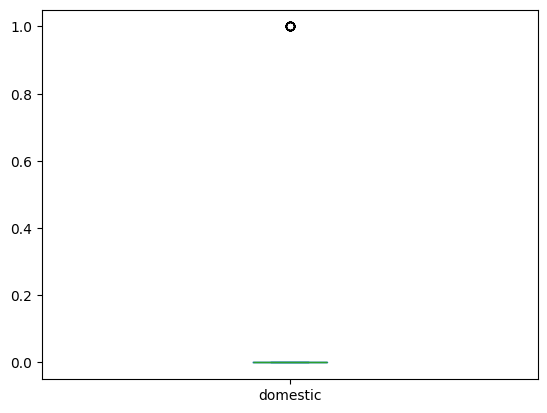

In [1604]:
df['domestic'].plot(kind='box')     # outliers are present on the upper side

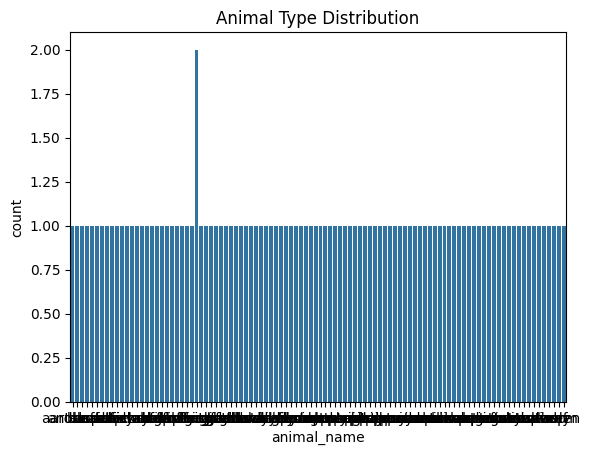

In [1606]:
# Check class distribution
sns.countplot(x='animal_name', data=df)  # Replace 'Animal_Type' with your target column name
plt.title("Animal Type Distribution")
plt.show()

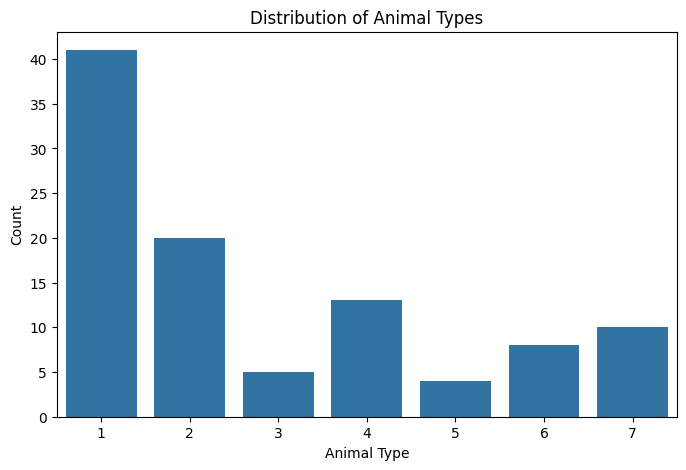

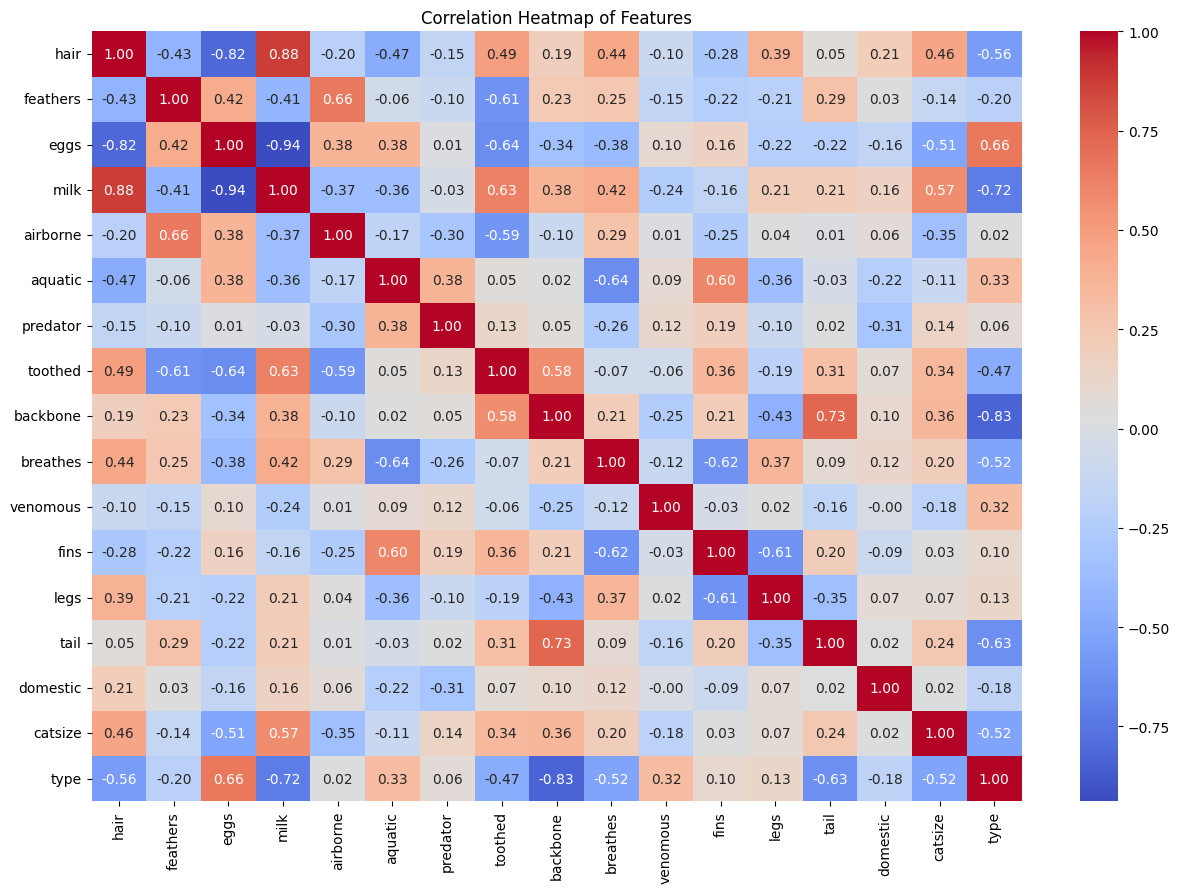

In [1607]:
# Visualize the distribution of the 'type' target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# Correlation heatmap of features
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop(columns='animal_name').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

<Axes: >

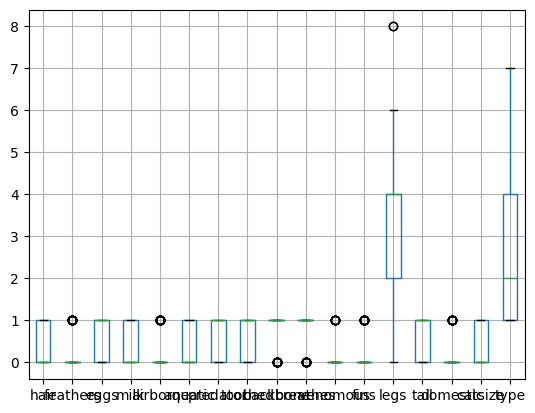

In [1608]:
df.boxplot()

In [1610]:
# Drop the 'animal name' column as it is not needed for classification
df_zoo = df.drop(columns=['animal_name'])


In [1612]:
# Splitting the dataset into features (X) and target (y)
X = df_zoo.drop(columns=['type'])
y = df_zoo['type']

In [1613]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [1615]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1616]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [1617]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
13,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
90,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1
33,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
61,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
18,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0
56,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1
32,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1


In [1618]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
43,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
47,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
49,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
40,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0


In [1619]:
y_train

13    7
90    3
33    2
61    4
18    4
     ..
88    6
52    5
56    2
32    1
93    1
Name: type, Length: 80, dtype: int64

In [1620]:
y_test

89    5
43    2
12    4
87    2
47    1
49    1
60    4
40    6
10    1
7     4
53    7
94    1
31    1
14    7
44    1
21    2
80    3
51    6
22    1
65    1
37    2
Name: type, dtype: int64

In [1621]:
# Implementing KNN with an initial K value (e.g., 3) and Euclidean distance
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [1622]:
# Predicting the test set results
y_pred = knn.predict(X_test)

In [1634]:
# Evaluating the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

C:\Users\shubham\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shubham\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shubham\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [1636]:
accuracy, precision, recall, f1, report

(0.9523809523809523,
 0.9166666666666666,
 0.9523809523809523,
 0.9319727891156462,
 '              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         8\n           2       1.00      1.00      1.00         4\n           3       0.00      0.00      0.00         1\n           4       0.75      1.00      0.86         3\n           5       1.00      1.00      1.00         1\n           6       1.00      1.00      1.00         2\n           7       1.00      1.00      1.00         2\n\n    accuracy                           0.95        21\n   macro avg       0.82      0.86      0.84        21\nweighted avg       0.92      0.95      0.93        21\n')

In [1638]:
accuracy

0.9523809523809523

In [1640]:
precision

0.9166666666666666

In [1642]:
recall

0.9523809523809523

In [1644]:
report

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         8\n           2       1.00      1.00      1.00         4\n           3       0.00      0.00      0.00         1\n           4       0.75      1.00      0.86         3\n           5       1.00      1.00      1.00         1\n           6       1.00      1.00      1.00         2\n           7       1.00      1.00      1.00         2\n\n    accuracy                           0.95        21\n   macro avg       0.82      0.86      0.84        21\nweighted avg       0.92      0.95      0.93        21\n'

In [1654]:
# Select two features for visualization
feature_1 = 'hair'  # Example: 'hair'
feature_2 = 'feathers'  # Example: 'feathers'

In [1656]:
# Extract the two features and target variable
X_2D = df_zoo[[feature_1, feature_2]]
y_2D = y  # 'type' is already assigned to y

In [1658]:
# Split into training and testing sets
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_2D, y_2D, test_size=0.2, random_state=42, stratify=y_2D)


In [1660]:
# Train the KNN classifier on the 2D data
knn_2D = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_2D.fit(X_train_2D, y_train_2D)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [1662]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_2D[feature_1].min() - 1, X_2D[feature_1].max() + 1
y_min, y_max = X_2D[feature_2].min() - 1, X_2D[feature_2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [1664]:
# Predict the class for each point in the mesh grid
Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\shubham\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


C:\Users\shubham\AppData\Local\Temp\ipykernel_14112\1051851567.py:9: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2D[feature_1], X_test_2D[feature_2], c=y_test_2D, edgecolor='k', s=100, cmap=plt.cm.RdYlBu, marker='x', label='Testing data')


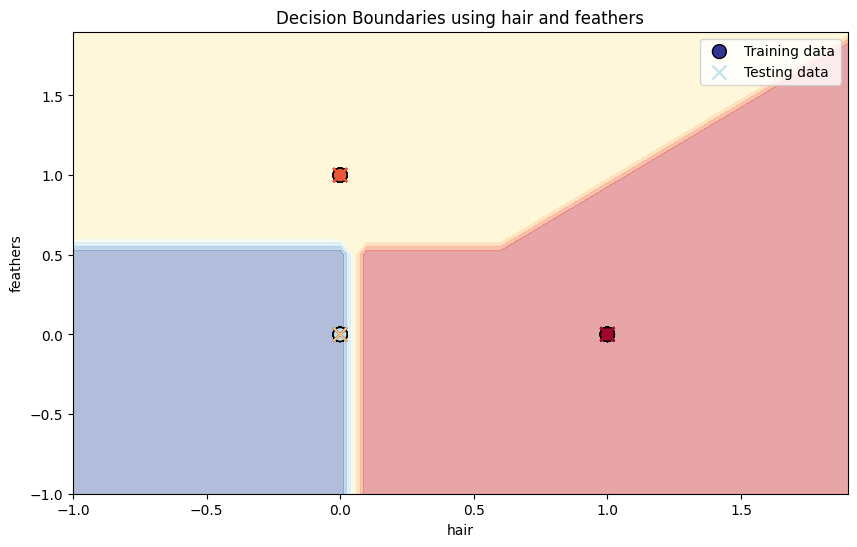

In [1674]:
# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot the training points
plt.scatter(X_train_2D[feature_1], X_train_2D[feature_2], c=y_train_2D, edgecolor='k', s=100, cmap=plt.cm.RdYlBu, label='Training data')

# Plot the testing points
plt.scatter(X_test_2D[feature_1], X_test_2D[feature_2], c=y_test_2D, edgecolor='k', s=100, cmap=plt.cm.RdYlBu, marker='x', label='Testing data')

plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title(f'Decision Boundaries using {feature_1} and {feature_2}')
plt.legend()
plt.show()

Interview Questions:


1. What are the key hyperparameters in KNN

Number of Neighbors (k): Determines how many nearest neighbors are considered during classification.
Distance Metric: Specifies how the distance between points is calculated (e.g., Euclidean, Manhattan, Minkowski).
Weights: Controls whether all neighbors are weighted equally or closer neighbors are given higher importance.

?3
2. What distance metrics can be used in KN
   N

The choice of distance metric significantly impacts the performance of KNN. Here are some common distance metrics:
Euclidean Distance:
The most commonly used distance metric.
Calculates the straight-line distance between two points in Euclidean space.
Suitable for continuous numerical features.
Manhattan Distance:
Also known as L1 distance.
Calculates the sum of absolute differences between the coordinates of two points
Less sensitive to outliers compared to Euclidean distance.
Minkowski Distance:
A generalization of Euclidean and Manhattan distances.
Can be adjusted by a parameter p to control the distance metric.
When p=1, it becomes Manhattan distance.
When p=2, it becomes Euclidean distance.
Hamming Distance:
Used for categorical data.
Counts the number of positions at which the corresponding symbols are different.?
